Analysis and Observations:

1.  Uraban areas clearly have the highest number of drivers, number of riders but the lowest aaverage fares. This is the best place for making money assuming you are doing this for a living. Many short trips and lot sof demand.
2. Rural areas are good if you want to take a few rides but get higher payouts.  However, we should probably look at average distances here as well. How many of the rural rides end up going to the burbs or the city?
3. The best places to be a driver in order would be Urban, Burbs and Rural. Id rather have many shorter rides (40 rides at 25) vs longer ones in the rural areas where you might get 10 rides at 40 each. (assuming you get all of course.). This is also why i live in the city. I wan tlots of competition for my ride money.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined = pd.merge(city,
                 ride,
                 on='city', how='outer')
# Display the data table for preview
combined.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

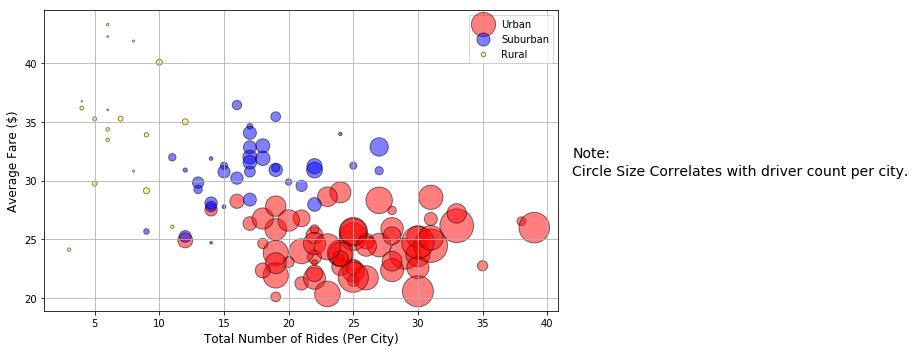

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban = combined.loc[combined['type'] == 'Urban']
suburban = combined.loc[combined['type'] == 'Suburban']
rural = combined.loc[combined['type'] == 'Rural']
rural.head(2)
fig, ax = plt.subplots(figsize=(8,5))
#####groupby cities and get count number of rides for each
urban_city_count = urban.groupby(['city'])[["ride_id"]].count()
suburban_city_count = suburban.groupby(['city'])[["ride_id"]].count()
rural_city_count = rural.groupby(['city'])[["ride_id"]].count()
#####groupby cities and get caverage cost
urban_city_mean = urban.groupby(['city'])[["fare"]].mean()
suburban_city_mean = suburban.groupby(['city'])[["fare"]].mean()
rural_city_mean = rural.groupby(['city'])[["fare"]].mean()
#get drivercount per city
urban_city_driver_count = urban.groupby(['city'])[["driver_count"]].sum()
suburban_city_driver_count = suburban.groupby(['city'])[["driver_count"]].sum()
rural_city_driver_count = rural.groupby(['city'])[["driver_count"]].sum()

# Build the scatter plots for each city types
urban = plt.scatter(urban_city_count, urban_city_mean, marker="o", facecolors="red", edgecolors="black",s=urban_city_driver_count['driver_count']/2, alpha=0.5, label="Urban")
suburban = plt.scatter(suburban_city_count, suburban_city_mean, marker="o", facecolors="blue", edgecolors="black",s=suburban_city_driver_count['driver_count']/2, alpha=0.5, label="Suburban")
rural =plt.scatter(rural_city_count, rural_city_mean, marker="o", facecolors="yellow", edgecolors="black",s=rural_city_driver_count['driver_count']/2, alpha=0.5, label="Rural")

#axis, legend- grid formatting,etc
ax.set_xlabel("Total Number of Rides (Per City)", fontsize=12)
ax.set_ylabel("Average Fare ($)", fontsize=12)
#why is this giving error?
#https://matplotlib.org/gallery/text_labels_and_annotations/custom_legends.html --- use this to customize the legend
plt.legend(scatterpoints= 1)
plt.gcf().text(1., 0.55, 'Note:', fontsize=14)
plt.gcf().text(1., 0.5, 'Circle Size Correlates with driver count per city.', fontsize=14)

plt.tight_layout()
plt.grid()

# Save Figure
plt.savefig('pyber_bubble_plt.jpg')
plt.show();

TOTAL FARES BY CITY TYPE


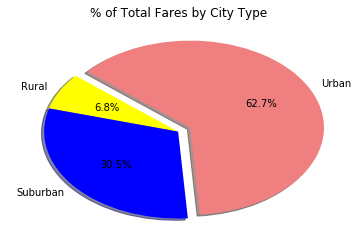

In [3]:
#sum up all the fare measures - total and by city type %
total_fare = combined['fare'].sum()
Fare_by_city_type = (combined.groupby(['type'])[["fare"]].sum()/total_fare)*100
#Build Pie chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = Fare_by_city_type['fare']

# The colors of each section of the pie chart
colors = ["yellow", "blue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.0, 0.1)
plt.title('% of Total Fares by City Type')
# Show plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig('pyber_tot_fares_by_city_type.jpg')

TOTAL RIDES BY CITY TYPE

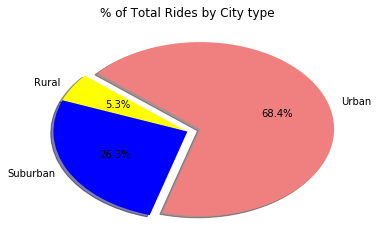

In [4]:
##################TOTAL RIDES BY CITY TYPE
#count all rides by city type
Total_rides = combined['type'].count()
Ride_count_by_city_type = (combined.groupby(['type'])[["ride_id"]].count()/Total_rides)*100
#Build Pie chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = Ride_count_by_city_type['ride_id']

# The colors of each section of the pie chart
colors = ["yellow", "blue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.0, 0.1)
plt.title('% of Total Rides by City type')
# Show plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig('pyber_tot_rides_by_type.jpg')

## Total Rides by City Type

## Total Drivers by City Type

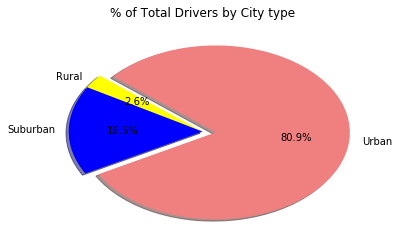

In [5]:
# Calculate Driver Percents
#count all rides by city type and drop the duplicates. --No double counting
Total_drivers = combined['driver_count'].sum()
combined_drop_dupes = combined.drop_duplicates(subset=['city', 'driver_count'], keep='first')
drivers_count_by_city_type = combined_drop_dupes.groupby(['type'])[["driver_count"]].sum()
# Build Pie Charts

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = drivers_count_by_city_type['driver_count']

# The colors of each section of the pie chart
colors = ["yellow", "blue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.0, 0.1)
plt.title('% of Total Drivers by City type')
# Show plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig('pyber_tot_drivers_by_type.jpg')
